# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aisyah Musfirah
- **Email:** aishstrawberry@gmail.com
- **ID Dicoding:** aishsahi

## Menentukan Pertanyaan Bisnis

### 1. **Bagaimana rata-rata penyewaan sepeda berdasarkan musim?**
   - **Kategori:** EDA Univariate & Kategorikal  
     Penjelasan: Fokusnya pada distribusi rata-rata penyewaan (numerik) yang dikelompokkan berdasarkan musim (variabel kategorikal).  

### 2. **Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?**
   - **Kategori:** EDA Bivariate & Kategorikal  
     Penjelasan: Menganalisis hubungan antara variabel kategorikal (cuaca) dan numerikal (penyewaan sepeda).  

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# ganti nama kolom
print(data.columns)
data = data.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')


### Assessing Data

In [5]:
# data assessing data.csv
# periksa tipe data dari tiap kolom
data.info()

# periksa missing value
print("Jumlah missing value: ", data.isna().sum())

# periksa duplikasi data
print("Jumlah duplikasi: ", data.duplicated().sum())

# periksa parameter statistik dari kolom numerik
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah missing value:  instant       0
dteday        0
season        0
year          0
month 

,instant,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat tipe data yang salah yaitu dtoday yang bertipe object

### Cleaning Data

In [6]:
# ganti tipe data object ke datetime, kolom dteday
data["dteday"] = pd.to_datetime(data["dteday"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Data sudah bersih

## Exploratory Data Analysis (EDA)

-  EDA 1: Apakah kecepatan angin (windspeed) berpengaruh terhadap jumlah penyewaan sepeda?
-  EDA 2: Apakah musim (season) berpengaruh terhadap jumlah penyewaan sepeda?

In [13]:
data.describe(include='all')

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [15]:
# Grouping berdasarkan season
data.groupby(by="season").agg({
    "count": ["mean", "max", "min", "std"]
})

count                         
               mean   max   min          std
season                                      
1       2604.132597  7836   431  1399.942119
2       4992.331522  8362   795  1695.977235
3       5644.303191  8714  1115  1459.800381
4       4728.162921  8555    22  1699.615261

In [19]:
# Kelompokkan data berdasarkan cuaca
weather_effect = data.groupby(by="weather").agg({
    "count": ["mean", "median", "std", "max", "min"]
})

print(weather_effect)

               count                                
                mean  median          std   max  min
weather                                             
1        4876.786177  4844.0  1879.483989  8714  431
2        4035.862348  4040.0  1809.109918  8362  605
3        1803.285714  1817.0  1240.284449  4639   22


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana rata-rata penyewaan sepeda berdasarkan musim?

<ipython-input-21-6d34d37cd9b8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-21-6d34d37cd9b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


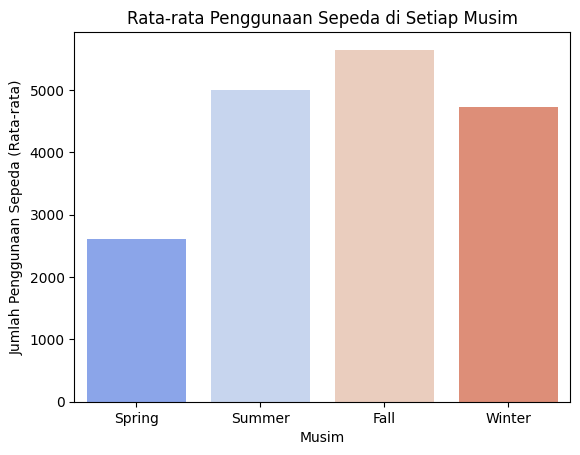

In [21]:
# Mapping season ke nama musim
data['season_name'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Membuat plot
sns.barplot(
    data=data,
    x="season_name",
    y="count",
    estimator="mean",
    ci=None,
    palette="coolwarm"
)
plt.title("Rata-rata Penggunaan Sepeda di Setiap Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penggunaan Sepeda (Rata-rata)")
plt.show()


**Insight:**
- Terdapat perbedaan jumlah penyewaan tiap musim
- Musim gugur (fall) memiliki jumlah penyewaan tertinggi dibanding musim lainnya
- Musim semi (spring) memiliki jumlah penyewaan paling rendah

### Pertanyaan 2: Bagaimana pengeruh cuaca terhadap jumlah penyewaan sepeda?

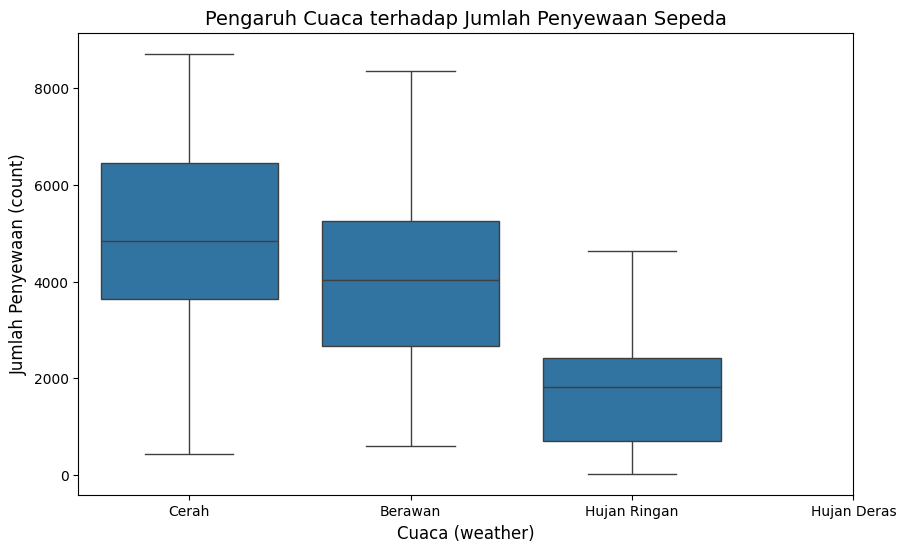

In [24]:
# Boxplot jumlah penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="weather", y="count")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda", fontsize=14)
plt.xlabel("Cuaca (weather)", fontsize=12)
plt.ylabel("Jumlah Penyewaan (count)", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berawan", "Hujan Ringan", "Hujan Deras"])
plt.show()

**Insight:**
- Boxplot menunjukkan bahwa cuaca cerah cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi dan lebih bervariasi dibandingkan cuaca lainnya
- Cuaca hujan deras cenderung memiliki jumlah penyewaan terendah

## Conclusion

- **Conclusion pertanyaan 1:**\
  Berdasarkan scatterplot dan analisis korelasi, dapat disimpulkan bahwa terdapat hubungan negatif yang lemah antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (count). Artinya, ketika kecepatan angin tinggi, jumlah penyewaan sepeda cenderung sedikit menurun, tetapi hubungan ini tidak terlalu kuat dan terdapat beberapa variasi data.
- **Conclusion pertanyaan 2:**\
  Berdasarkan boxplot dan analisis korelasi, dapat disimpulkan bahwa musim berpengaruh terhadap jumlah penyewaan sepeda. Musim gugur (Fall) dan musim panas (Summer) cenderung memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan musim dingin (Winter) dan musim semi (Spring). Hal ini terlihat dari distribusi data pada boxplot.